# Esercitazione 10
**7  Maggio 2024**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg
import SolveTriangular

### Codice EquazioniNormali
Implementare la function  **eqnorm(A,b)** che implementa il metodo delle equazioni normali per la soluzione del sistema sovradeterminato Ax=b e che prende in input:
- la matrice A di dimensione $m \times n$ , $m>n$
- il termine noto b di ordine m
restituisce in output
- la soluzione del sistema lineare 

In [2]:
def eqnorm(A,b):
    G=A.T@A
    print("indice di condizionamento", np.linalg.cond(G))
    L=scipy.linalg.cholesky(G,lower=True)
    f=A.T@b
    y, flag=SolveTriangular.Lsolve(L,f)
    if flag==0:
        x, flag=SolveTriangular.Usolve(L.T,y)
    return x
    

### Codice QRLS
Implementare la function  **qrLS(A,b)** che utilizza il metodo QR per la soluzione del sistema sovradeterminato Ax=b e che prende in input:
- la matrice A di dimensione $m \times n$ , $m>n$
- il termine noto b di ordine m
restituisce in output
- la soluzione del sistema lineare e la norma 2 al quadrato del residuo.

In [3]:
def qrLS(A,b):
    Q,R=scipy.linalg.qr(A)
    n=A.shape[1]
    h=Q.T@b
    x,flag=SolveTriangular.Lsolve(R[0:n,:],h[0:n])
    h2=(np.linalg.norm(h[n:],2))**2
    return x, h2

### Codice SVDLS
Implementare la function  **svdLS(A,b)** che utilizza  il metodo SVD per la soluzione del sistema sovradeterminato Ax=b e che prende in input:
- la matrice A di dimensione $m \times n$ , $m>n$
- il termine noto b di ordine m
restituisce in output
- la soluzione del sistema lineare e la norma 2 al quadrato del residuo.

In [4]:
def svdLS(A,b):
    m,n=A.shape
    U,s,VT=scipy.linalg.svd(A)
    V=VT.T
    thresh=np.spacing(1)*m*s[0] ##Calcolo del rango della matrice, numero dei valori singolari maggiori di una soglia
    k=np.count_nonzero(s>thresh)
    print("rango=",k)

    d=U.T@b
    d1=d[:k].reshape((k,1))
    s1=s[:k].reshape((k,1))
    c=d1/s1
    x=V[:,:k]@c
    d2=d[k:]
    res=(np.linalg.norm(d2,2))**2

    return x, res

## Esercizio 1
- Si utilizzino i tre metodi implementati  per l'approssimazione ai minimi quadrati delle seguenti configurazioni di dati:

$$
\begin{array}{l}
x_1 = [-3.5, \, -3, \, -2, \, -1.5, \, -0.5, \, 0.5, \, 1.7, \, 2.5, \, 3] ;\\
y_1 = [-3.9, \, -4.8, \, -3.3, \, -2.5, \, 0.3, \, 1.8, \, 4, \, 6.9, \, 7.1] ;\\
x_2 = [-3.14, \, -2.4, \, -1.57, \, -0.7, \, -0.3, \, 0, \, 0.4, \, 0.7, \, 1.57] ;\\
y_2 = [0.02, \, -1, \, -0.9, \, -0.72, \, -0.2, \, -0.04, \, 0.65, \, 0.67, \, 1.1] ;\\
x_3 = [[1.001,\, 1.004,\, 1.005,\,1.0012, \,1.0013,  \, 1.0014,  \, 1.0015, \, 1.0016] ;\\
y_3 = [-1.2, \, -0.95, \, -0.9, \, -1.15, \, -1.1, \, -1] ;\\
\end{array}
$$

al variare del grado $n$ tra 1 e 4.



indice di condizionamento 3.3983601352888497
rango= 2


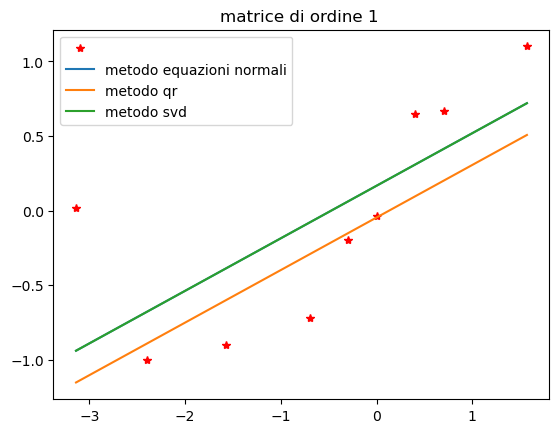

indice di condizionamento 34.842259656913214
rango= 3


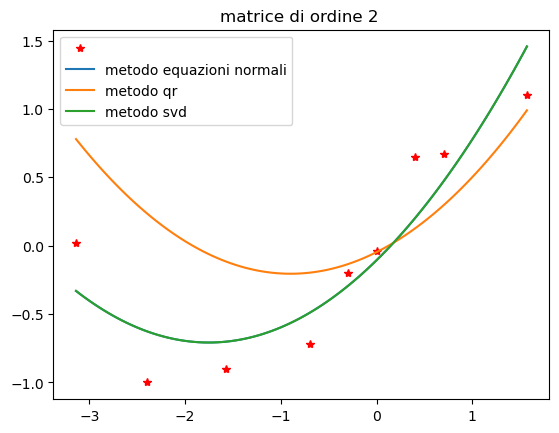

indice di condizionamento 460.12313722404457
rango= 4


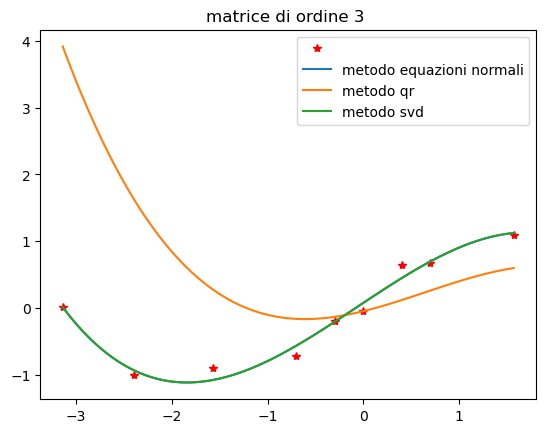

In [5]:
#x1 = np.array([-3.5,-3.0,-2.0,-1.5,-0.5,0.5,1.7, 2.5,3.0])
#y1 = np.array([-3.9,-4.8,-3.3,-2.5,0.3,1.8,4.0, 6.9,7.1]) 
x1=np.array( [-3.14,  -2.4,  -1.57,  -0.7,  -0.3,  0,  0.4,  0.7,  1.57]  )
y1=np.array(  [0.02,  -1, -0.9,   -0.72,   -0.2,   -0.04,  0.65,   0.67,   1.1] )

for n in np.arange(1,4):
    A=np.vander(x1,increasing=True)[:,:n+1]
    x_eq=eqnorm(A,y1)
    res_eq=np.linalg.norm(A@x_eq-y1.reshape(x1.shape[0],1))**2
    x_qr,res_qr=qrLS(A,y1)
    x_sv,res_sv=svdLS(A,y1)

    xv=np.linspace(np.min(x1), np.max(x1), 100)
    pol_eq=np.polyval(np.flip(x_eq), xv)
    pol_qr=np.polyval(np.flip(x_qr), xv)
    pol_sv=np.polyval(np.flip(x_sv), xv)

    plt.plot(x1,y1,'r*', xv,pol_eq,xv,pol_qr,xv,pol_sv)
    plt.title(f"matrice di ordine {n} ")
    plt.legend(['','metodo equazioni normali','metodo qr','metodo svd'])
    plt.show()
    
    # retta dei minimi quadrati con il metodo delle equazioni lineari non converge perchè la matrice di vandermonde è una matrcie mal condizionata
    # il metodo qr e il metodo svd convergono alla soluzione, ma il metodo svd quando il grado della matrice aumenta risulta essere più preciso poichè 
    # è meno soggetto al malcondizionamento della matrice


## Esercizio 2: 
Per i dati $(x_i, y_i)$ riportati nei seguenti array

$$
\begin{array}{l}
x = [0.0004, \, 0.2507, \, 0.5008, \, 2.0007, \, 8.0013]  ;\\
y = [0.0007, \, 0.0162, \, 0.0288, \, 0.0309, \, 0.0310] ;
\end{array}
$$

- costruire la retta di regressione;
- costruire la parabola approssimante i dati nel senso dei minimi quadrati;

Quale tra le due approssimazioni risulta la migliore? (Confrontare i grafici e la norma euclidea al quadrato del vettore dei residui).



indice di condizionamento 21.747838428408542
rango= 2


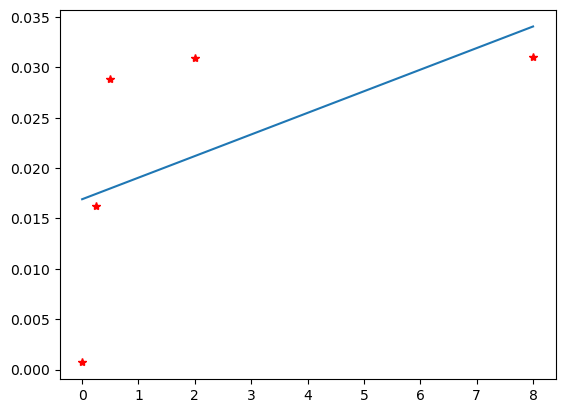

In [6]:
x = np.array([0.0004,0.2507,0.5008,2.0007,8.0013])
y = np.array([0.0007,0.0162,0.0288,0.0309,0.0310])
n=x.shape[0]
A1=np.vander(x,increasing=True)[:,:2]

x_eq=eqnorm(A1,y) 
res_eq=np.linalg.norm(A1@x_eq-y.reshape(n,1))**2
x_qr,res_qr=qrLS(A1,y)
x_sv,res_sv=svdLS(A1,y)

xv=np.linspace(np.min(x),np.max(x),100)
pol_eq=np.polyval(np.flip(x_eq),xv)
pol_qr=np.polyval(np.flip(x_qr),xv)
pol_sv=np.polyval(np.flip(x_sv),xv)

plt.plot(x,y,'r*',xv,pol_eq)


indice di condizionamento 4313.197120912335
rango= 3


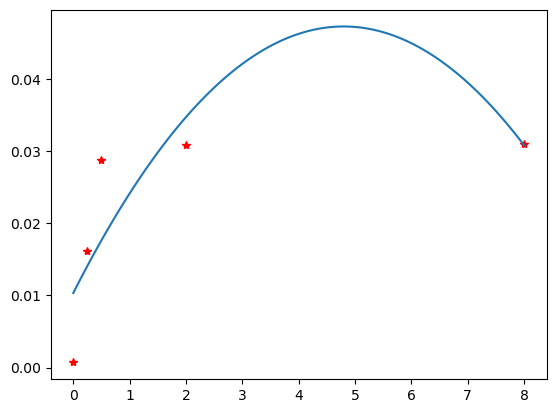

In [7]:
x = np.array([0.0004,0.2507,0.5008,2.0007,8.0013])
y = np.array([0.0007,0.0162,0.0288,0.0309,0.0310])
n=x.shape[0]
A1=np.vander(x,increasing=True)[:,:3]

x_eq=eqnorm(A1,y) 
res_eq=np.linalg.norm(A1@x_eq-y.reshape(n,1))**2
x_qr,res_qr=qrLS(A1,y)
x_sv,res_sv=svdLS(A1,y)

xv=np.linspace(np.min(x),np.max(x),100)
pol_eq=np.polyval(np.flip(x_eq),xv)
pol_qr=np.polyval(np.flip(x_qr),xv)
pol_sv=np.polyval(np.flip(x_sv),xv)

plt.plot(x,y,'r*',xv,pol_eq)

## Esercizio 3:
Scrivere uno script Python per approssimare la seguente configurazione di punti

$$
\begin{array}{l}
x = [10 \, : \, 0.5/5 \, : \, 10.5] ;\\
y = [11.0320, \, 11.1263, \, 11.1339, \, 11.1339, \, 11.1993, \, 11.1844] ;
\end{array}
$$

mediante un polinomio ai minimi quadrati di grado 4 costruito  con il metodo
delle equazioni normali, con il metodo QRLS e con il metodo SVDLS.
Perturbare poi il secondo punto nel seguente modo
$$x(1) = x(1) + 0.013; \quad y(1) = y(1) - 0.001;$$
e calcolare i polinomi ai minimi quadrati relativi alla
configurazione perturbata. Commentare e motivare i risultati ottenuti.



indice di condizionamento 356547012997.1385
rango= 5


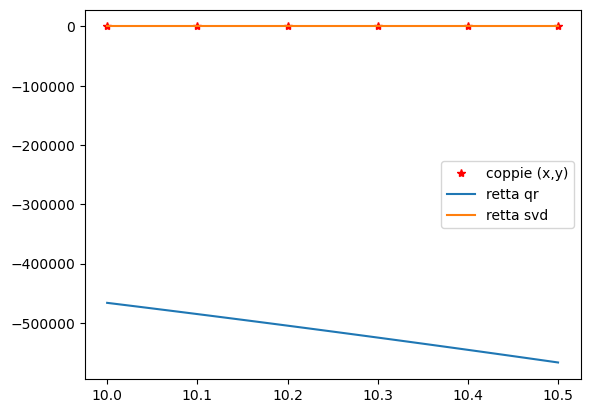

In [8]:
x=np.arange(10,10.6,0.1)
y=np.array([11.0320,11.1263,11.1339,11.1339,11.1993,11.1844])
A=np.vander(x,increasing=True)[:,:5]
n=x.shape[0]
print("indice di condizionamento", np.linalg.cond(A))

#x_eq=eqnorm(A,y)
#res_eq=np.linalg.norm(A@x_eq-y.reshape(n,1))**2
x_qr,res_qr=qrLS(A,y)
x_sv,res_sv=svdLS(A,y)

xv=np.linspace(10,10.5,100)
#pol_eq=np.polyval(np.flip(x_eq),xv)
pol_qr=np.polyval(np.flip(x_qr),xv)
pol_sv=np.polyval(np.flip(x_sv),xv)

plt.plot(x,y,'r*',xv,pol_qr,xv,pol_sv)
plt.legend(['coppie (x,y)','retta qr','retta svd'])

indice di condizionamento 380506144417.48584
rango= 5


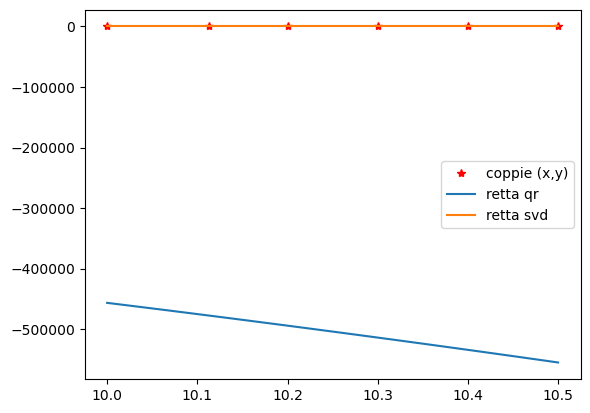

In [9]:
xp=x.copy()
xp[1]=xp[1]+0.013
yp=y.copy()
yp[1]=yp[1]-0.001
A1=np.vander(xp,increasing=True)[:,:5]
print("indice di condizionamento", np.linalg.cond(A1))
x_qr,res_qr=qrLS(A1,yp)
x_sv,res_sv=svdLS(A1,yp)

xv=np.linspace(np.min(xp),np.max(xp),100)
pol_eq=np.polyval(np.flip(x_eq),xv)
pol_qr=np.polyval(np.flip(x_qr),xv)
pol_sv=np.polyval(np.flip(x_sv),xv)

plt.plot(xp,yp,'r*',xv,pol_qr,xv,pol_sv)
plt.legend(['coppie (x,y)','retta qr','retta svd'])

### Codici per l'interpolazione polinomiale nella forma di Lagrange 

Scrivere la function **interpL** che calcoli
il polinomio interpolante in forma di Lagrange  
Tale function deve assumere come dati in input:
 
 - x vettore dei nodi di interpolazione,
- y vettore dei valori della funzione nei nodi di interpolazione,
- xx vettore dei punti in cui si vuole valutare il polinomio interpolante.
 
In output deve essere restituito yy vettore contenente i valori assunti dal polinomio interpolante.

 
Funzioni Python  utili:
 
-  numpy.poly() restituisce i coefficienti di un polinomio di zeri assegnati,
 - numpy.polyval(p, x)  valuta un polinomio in un punto assegnato.
 

In [10]:
def plagr(xnodi,j):
    """
    Restituisce i coefficienti del j-esimo pol di
    Lagrange associato ai punti del vettore xnodi
    """
    xzeri=np.zeros_like(xnodi)
    n=xnodi.size
    if j==0:
       xzeri=xnodi[1:n]
    else:
       xzeri=np.append(xnodi[0:j],xnodi[j+1:n])
    
    num=np.poly(xzeri)
    den=np.polyval(num,xnodi[j])
    
    p=num/den
    
    return p

def InterpL(x, y, xx):
    n=x.size
    m=xx.size
    L=np.zeros((m,n))
    for j in range(n):
        p=plagr(x,j)
        L[:,j]=np.polyval(p,xx)


    return L@y

## Esercizio 1

Realizzare uno script che calcoli nella forma di Lagrange i polinomi che
interpolano le funzioni test $\sin(x)$ e $\cos(x)$ nei punti $x_k = k \pi/2$, con
$k = 0, 1, 2, 3, 4$. Visualizzare graficamente i polinomi ottenuti insieme
alle funzioni assegnate.

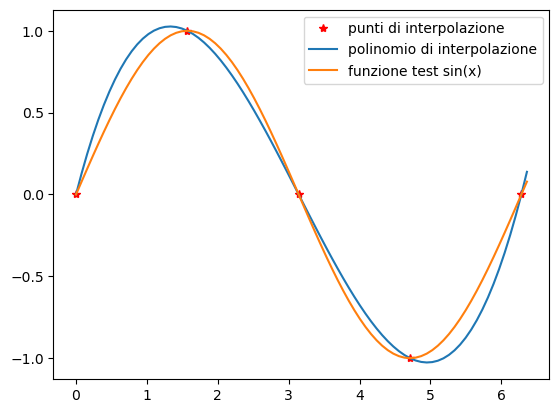

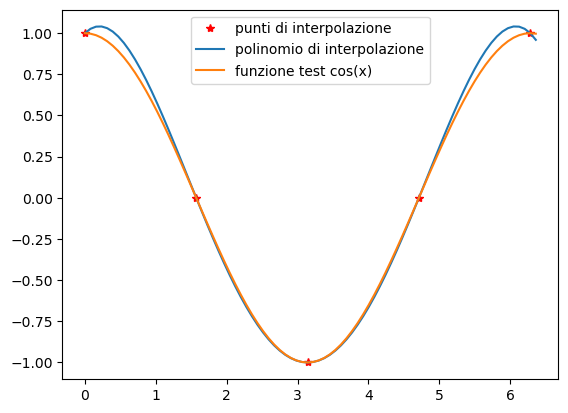

In [11]:
k=np.arange(0,5)
x=np.array([i*np.pi/2 for i in k])
f1=np.sin(x)
xx=np.arange(0,2*np.pi+0.1,np.pi/40)

polL=InterpL(x,f1,xx)
plt.plot(x,f1,'r*', xx,polL, xx,np.sin(xx))
plt.legend(['punti di interpolazione','polinomio di interpolazione','funzione test sin(x)'])
plt.show()

f2=np.cos(x)
polL=InterpL(x,f2,xx)
plt.plot(x,f2,'r*', xx,polL, xx,np.cos(xx))
plt.legend(['punti di interpolazione','polinomio di interpolazione','funzione test cos(x)'])
plt.show()

## Esercizio 2
Realizzare uno script python che interpola le coppie $x_i,y_i$, $i=0,\cdots,3$
dove $x_i,i=0,3$ sono punti equidistanti nell' intervallo [-1,1] e $y_i=f(x_i)$ dove $f(x)=3x^3+2x^2+2x-1$ 

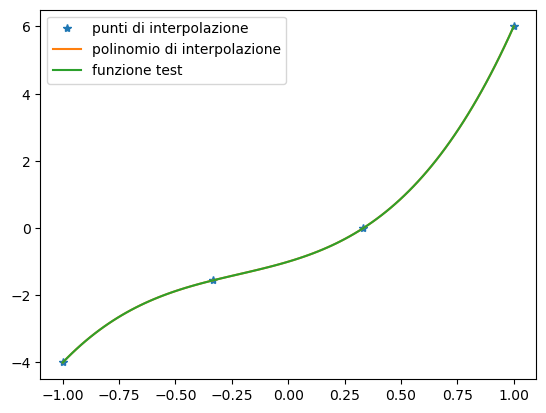

In [12]:
x=np.linspace(-1,1,4)
f = lambda x: 3*x**3+2*x**2+2*x-1
y=f(x)
xx=np.linspace(-1,1,100)

polL=InterpL(x,y,xx)
plt.plot(x,y,'*',xx,polL,xx,f(xx))
plt.legend(['punti di interpolazione','polinomio di interpolazione','funzione test'])

## Esercizio 3

La temperatura $T$ in  prossimità  del suolo  subisce una variazione dipendente dalla latitudine $L$ nel seguente modo

L=np.array([-55, -45, -35, -25, -15, -5, 5, 15, 25, 35, 45, 55, 65])

T=np.array([3.7, 3.7,3.52,3.27, 3.2, 3.15, 3.15, 3.25, 3.47, 3.52, 3.65, 3.67, 3.52])


 
- Si vuole costruire un modello che descriva la legge $T = T(L)$ anche per latitudini non misurate. A tal fine si scriva uno script che fornisca la variazione di temperatura alle latitudini $L = \pm 42$ utilizzando il polinomio interpolante. Visualizzare in un grafico i dati assegnati, il polinomio interpolante e le stime di $T$ ottenute per $L = \pm 42$.


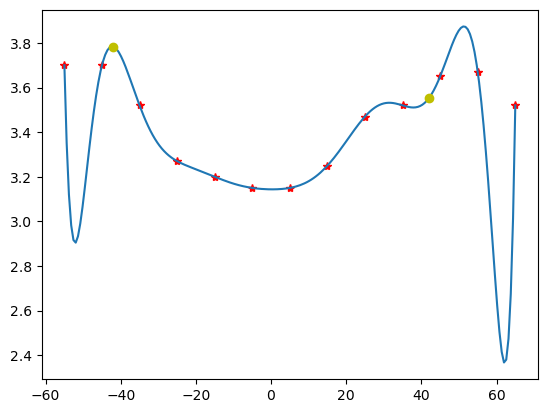

In [13]:
L=np.array([-55, -45, -35, -25, -15, -5, 5, 15, 25, 35, 45, 55, 65])
T=np.array([3.7, 3.7,3.52,3.27, 3.2, 3.15, 3.15, 3.25, 3.47, 3.52, 3.65, 3.67, 3.52])
xx=np.linspace(np.min(L),np.max(L),200)
polL=InterpL(L,T,xx)

L1=np.array([-42])
L2=np.array([42])
polL1=InterpL(L,T,L1)
polL2=InterpL(L,T,L2)


plt.plot(L,T,'r*',xx,polL, (-42),polL1,'yo', 42,polL2,'yo')


## Esercizio 4 

Scrivere uno script che calcoli il polinomio interpolante un insieme di punti $P_i =(x_i, y_i)$ $i = 0, ..., n $ nella forma di Lagrange con $x_i$ scelti dall'utente come:
    - punti equidistanti in un intervallo $[a, b]$,
    - punti definiti dai nodi di Chebyshev nell'intervallo $[a, b]$, ossia
$$
x_i = \frac{(a + b)}{2}+\frac{(b-a)}{2} \, \cos \left(
\frac{(2i+1)\pi}{2(n + 1)}
\right), \quad  i =0, ..., n 
$$
 
  e $y_i = f(x_i)$ ottenuti dalla valutazione nei punti $x_i$ di una funzione test   $f: \ [a, b] \rightarrow {\mathbb R}$. Testare lo script sulle funzioni
 
  - $f(x) = \sin(x)-2 \sin(2x)$,   $ \quad x \in [-\pi,\pi]$,
  -  $f(x) = \sinh(x)$, $ \quad  x \in [-2, 2]$,
  - $f(x) = |x|$,  $ \quad x \in [-1, 1]$,
  - $f(x) = 1/(1+25*x^2)$,  $ \quad x \in [-1, 1]$ (funzione di Runge).

Calcolare l'errore di interpolazione $r(x) = f(x)-p(x)$,
tra la funzione test $f(x)$ e il polinomio di interpolazione $p(x)$.
Visualizzare il grafico di $f(x)$ e $p(x)$, ed il grafico di
$|r(x)|$. Cosa si osserva? Cosa accade all'aumentare del grado $n$ di $p(x)$?
(Si costruisca una tabella che riporti i valori di $\|r(x)\|_{\infty}$ al variare di $n$).

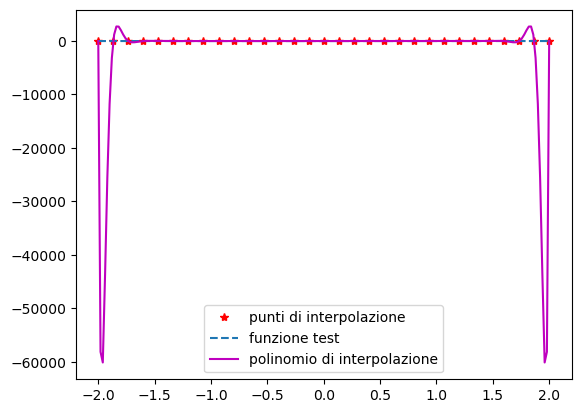

norma vettore residuo 60149.87471935232


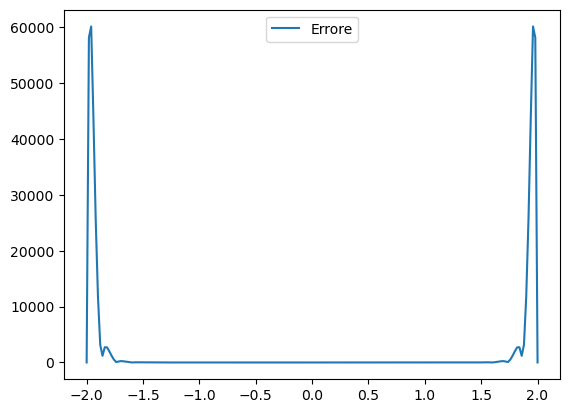

In [14]:
scelta = input("intervallo di valutazione del polinomio: a- punti equidistanti b-punti di Chebyshev")
#f= lambda x: np.sin(x)-2*np.sin(2*x)
#f=lambda x: np.sinh(x)
f=lambda x: np.abs(x)
a=-2
b=2
n=30

if scelta=="a":
    x=np.linspace(a,b,n+1)
else:
    x=np.array([((a + b)/2) + ((b - a)/2) * np.cos(((2*i + 1)*np.pi)/(2*(n + 1))) for i in range(n + 1)])
    #x=zeri_Cheb(a,b,n)

y=f(x)
xx=np.linspace(a,b,200)
polL=InterpL(x,y,xx)
plt.plot(x,y,'r*',xx,f(xx),'--', xx, polL, 'm-')
plt.legend(['punti di interpolazione','funzione test','polinomio di interpolazione'])
plt.show()
#se i punti sono scelti equidistanti dall'intervallo il polinomio di Lagrange non converge, 
#in particolare all'aumentare del grado del polinomio vi verificano grosse oscillazioni agli estremi
# mentre utilizzando i punti di Chebishev, il polinomio interpolatore,all'aumentare di punti, converge alla funzione originale
r=np.abs(f(xx)-polL)
print("norma vettore residuo",np.linalg.norm(r,np.inf))
plt.plot(xx,r)
plt.legend(['Errore'])

## Esercizio 5

Per $n = 5, 10, 15, 20$ fornire un'approssimazione della costante di Lebesgue
scegliendo $x_1, x_2, ..., x_{n+1}$ equispaziati in $[-1, 1]$ oppure coincidenti con
i nodi di Chebyshev $x_i = \cos \left(\frac{(2i-1)\pi}{2(n + 1)}  \right)$, $i =1, ..., n + 1$.

[[3.10493825e+00]
 [2.98943063e+01]
 [5.08711306e+02]
 [1.07596490e+04]] 
 [[2.93712160e+16]
 [7.45906001e+13]
 [4.92698833e+11]
 [3.83258511e+09]]


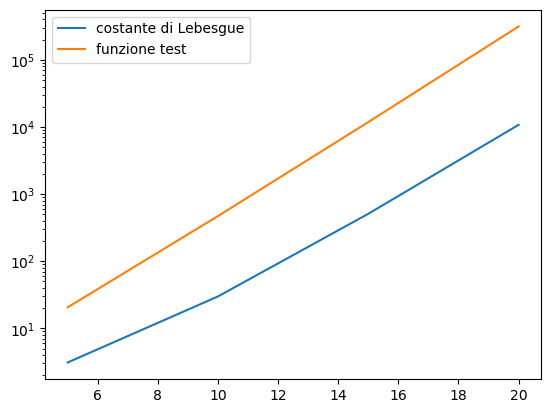

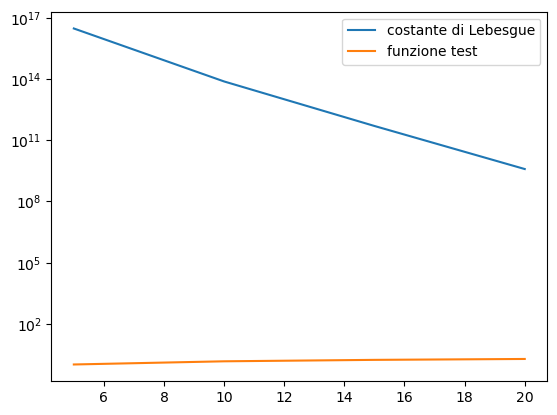

In [24]:
n=np.arange(5,25,5)
xx=np.linspace(-1,1,200)
LLe=np.zeros((4,1))
LLc=np.zeros((4,1))
a=-1
b=1
index=0
for i in n:
    x_eq=np.linspace(a,b,i+1)
    x_chev=np.array([(a+b)/2 +(b-a)/2*np.cos( ((2*j-1)*np.pi)/(2*(i+1)) ) for j in range(i+1)])
    
    Le=np.zeros((200,1))
    Lc=np.zeros((200,1))
    for j in range(i+1):
        pe=plagr(x_eq,j)
        Le=Le+np.abs(np.polyval(pe,xx))
        pchev=plagr(x_chev,j)
        Lc=Lc+np.abs(np.polyval(pchev,xx))

    LLe[index]=np.max(Le)
    LLc[index]=np.max(Lc)
    index+=1

f1=lambda x: (2**(x+1))/x*np.log(x)
f2=lambda x: (2/np.pi)*np.log(x)

plt.semilogy(n,LLe, n,f1(n))
plt.legend(['costante di Lebesgue','funzione test'])
plt.show()
plt.semilogy(n,LLc, n,f2(n))
plt.legend(['costante di Lebesgue','funzione test'])
plt.show()



## Esercizio 6

Si interpolino mediante il polinomio $p_{21}(x)$ i 22 punti $(x_i, y_i)$ con $x_i$ equispaziati in $[-1, 1]$ e $y_i = \sin(2 \pi x_i)$. Si considerino poi le ordinate $\tilde{y}_i = y_i + \varepsilon_i$, dove $\varepsilon_i$ denota l'$i$-esima componente del vettore $0.0002*np.random.random(22,)$, e si calcoli il corrispondente
polinomio interpolante $\tilde{p}_{21}(x)$. Si visualizzino e si commentino
i risultati ottenuti, calcolando anche l'errore relativo sul polinomio interpolante
e sui dati.


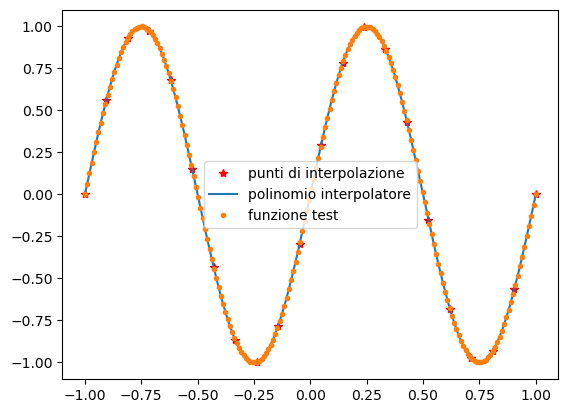

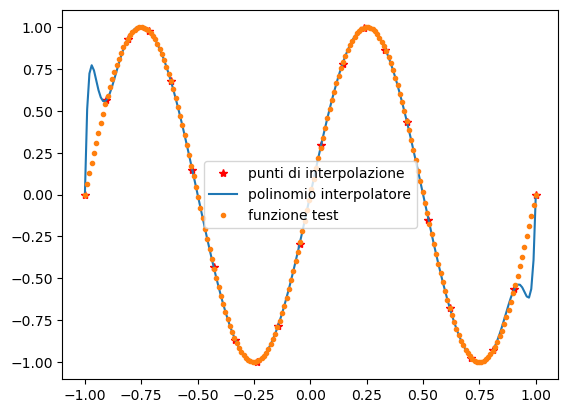

0.0001568405286410066
0.14574853169613125


In [37]:
x=np.linspace(-1,1,22)
xx=np.linspace(-1,1,200)
f=lambda x: np.sin(2*np.pi*x)
y=f(x)

polL=InterpL(x,y,xx)
plt.plot(x,y,'r*',xx, polL,'-', xx,f(xx),'.')
plt.legend(['punti di interpolazione','polinomio interpolatore','funzione test'])
plt.show()

yp=y.copy()
yp=yp+(0.0002*np.random.random(22,))
polLP=InterpL(x,yp,xx)
plt.plot(x,yp,'r*',xx, polLP,'-', xx,f(xx),'.')
plt.legend(['punti di interpolazione','polinomio interpolatore','funzione test'])
plt.show()

errore_dati=np.linalg.norm(yp-y)/np.linalg.norm(y)
errore_ris=np.linalg.norm(polLP-polL)/np.linalg.norm(polL)
print(errore_dati)
print(errore_ris)
